In [1]:
import numpy as np
import pandas as pd

wines = pd.read_csv('wine_data.csv')

In [2]:
wines[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [3]:
# Shuffle the data set
wines.reindex(np.random.permutation(wines.index))
# Choose the labesl
feature_labels = ['alcohol', 'density', 'sulphates', 'residual sugar', 'pH', 'fixed acidity']
# Get the features and target
features = np.array(wines[feature_labels])
target = np.array(wines['quality'])

# Set the pivot
pivot = len(wines) * .8

# Split into test and training
training_features = features[:pivot]
testing_features = features[pivot:]
training_target = target[:pivot]
testing_target = target[pivot:]

C:\Users\Erik\Anaconda\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Erik\Anaconda\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Erik\Anaconda\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Erik\Anaconda\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


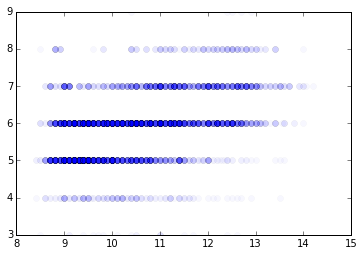

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Look at a few features, see if theres any features that might have coralation
plt.plot(wines['alcohol'], wines['quality'], 'o', alpha=0.03)

Visualization of Logistic Regression from last week
![Visualization of Logistic Regression from last week](https://i.imgur.com/V19dj67.png)

![KNN visualized](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# typical setup for ml with sklearn
knn_model = KNeighborsClassifier(n_neighbors=3)

In [8]:
knn_model.fit(training_features, training_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [9]:
print "Predictions for the first 5 wines: ", knn_model.predict(testing_features)[:5]
prediction = knn_model.predict_proba(testing_features)
print "Probability of each score:", prediction[:5]

Predictions for the first 5 wines:  [7 5 7 5 7]
Probability of each score: [[ 0.          0.          0.          0.33333333  0.66666667  0.          0.        ]
 [ 0.          0.          0.33333333  0.33333333  0.          0.33333333
   0.        ]
 [ 0.          0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.66666667  0.33333333  0.          0.          0.        ]
 [ 0.          0.          0.          0.33333333  0.66666667  0.          0.        ]]


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# lets also add a logistic regression model to compare
log_model = LogisticRegression(random_state=123)
log_model.fit(training_features, training_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=123, tol=0.0001)

In [12]:
print "Predictions for the first 10 wines:", log_model.predict(testing_features)[:5]
prediction = log_model.predict_proba(testing_features)
print "Probability of each score:", prediction[:5]

Predictions for the first 10 wines: [7 7 6 6 7]
Probability of each score: [[  7.20011337e-04   4.08967148e-03   1.09315951e-02   2.79476128e-01
    4.74431886e-01   2.27210230e-01   3.14047811e-03]
 [  1.58640974e-03   9.10006036e-03   3.15226231e-02   3.35781958e-01
    4.50248511e-01   1.68070414e-01   3.69002396e-03]
 [  5.54194320e-03   3.80230852e-02   1.89332308e-01   4.68177039e-01
    2.55007566e-01   4.16748741e-02   2.24318480e-03]
 [  4.30177642e-03   1.40943905e-02   2.77469978e-01   5.10679041e-01
    1.63718293e-01   2.93813456e-02   3.55175927e-04]
 [  1.93560713e-03   1.18388997e-02   5.11993714e-02   3.80783561e-01
    4.20506684e-01   1.30716002e-01   3.01987460e-03]]


In [14]:
print "KNN score:", knn_model.score(testing_features, testing_target)
print "Logistic score:", log_model.score(testing_features, testing_target)

KNN score: 0.444897959184
Logistic score: 0.515306122449


In [15]:
# lets try 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(training_features, training_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [16]:
knn_model.score(testing_features, testing_target)

0.48979591836734693

In [17]:
# lets try to optimize the number of neighbors
best_score = 0
best_k = 0
for k in range(1, 200):
    knn_model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_model.fit(training_features, training_target)
    score = knn_model.score(testing_features, testing_target)
    if score > best_score:
        best_score = score
        best_k = k
print "the best score with these features was %s with %s neighbors" % (best_score, best_k)

the best score with these features was 0.533673469388 with 142 neighbors


In [27]:
# we havent dove into sklearn docs really, lets try some other settings
# lets try 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)
knn_model.fit(training_features, training_target)
knn_model.score(testing_features, testing_target)

0.48979591836734693

In [ ]:
# lets try the same brute force approach we took last week, but try both algs. 
# Theres file in the repo called bruteforce_optimization.py...